In [1]:
import pathlib
import sys

sys.path.append("../")

local_path = pathlib.Path().resolve()

from typing import List, Optional, Dict, Tuple
from scipy.optimize import minimize
from collections import deque

import pandas as pd
import rust_statespace as rs
import numpy as np
import matplotlib.pyplot as plt

from statespace.utils import _initiate_variables, _map_vector_to_matrices, _get_nan_positions, _remove_nan_tensor, _remove_inf_tensor, _get_bounds, read_target_from_path
from statespace.StateSpacingKalman import KalmanV1, KalmanV2, KalmanV3
from statespace.StateSpacingProtocols import KalmanProtocol, MathProtocol
from statespace.StateSpacingClasses import LinearGaussianModel_v2_numpy as LGM
from statespace.StateSpacingClasses import LinearGaussianModel_v3_rust as LGM_rust
from statespace.StateSpacingClasses import LLM_v1_numpy as LLM

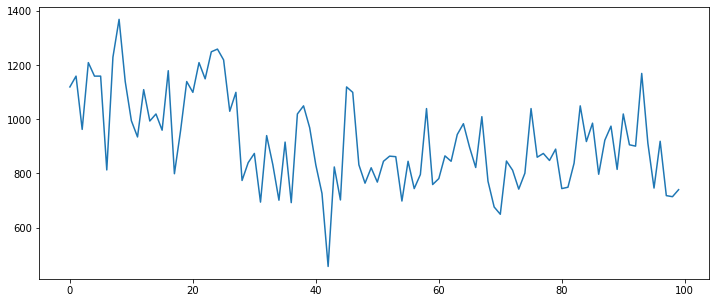

In [2]:
dtype=np.float64
base_dir = pathlib.Path().resolve().parent
data_dir = base_dir / 'data'
nile_path = data_dir / 'Nile.txt'

# get data into shape [s, 1, n]
y = read_target_from_path(nile_path, dtype, header='infer')
#y[:, :, 20:40] = np.nan

plt.figure(figsize=(12, 5))
plt.plot(np.squeeze(y))

assuming component at index 0 is main component of y


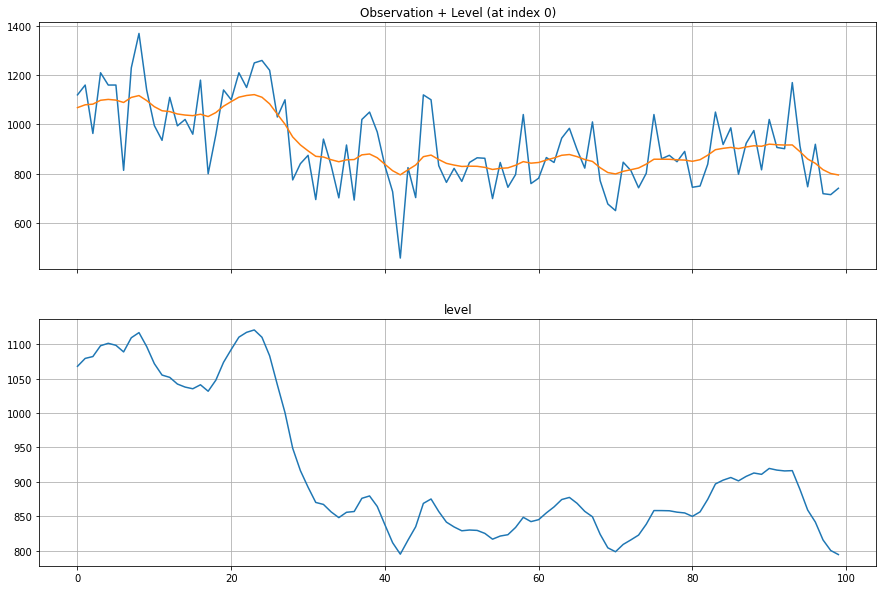

In [3]:
# Declare State Matrices Local Level Model -> use [[]] for extra dimension
T = np.array([[1]]).astype(dtype)
Z = np.array([[1]]).astype(dtype)
R = np.array([[1]]).astype(dtype)
Q = np.array([[1]]).astype(dtype)
H = np.array([[1]]).astype(dtype)
diffuse = True

dict_param_llm = {
    0: {"matrix" : "Q", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)},
    1:  {"matrix" : "H", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)}
}

filter_map = {0: "level"}

llm = LGM(y, T, Z, R, Q, H, diffuse, dict_param_llm, filter_map)
llm.fit()
llm.plot_states()

In [4]:
# Declare State Matrices Local Level Model -> use [[]] for extra dimension
T = np.array([[1]]).astype(dtype)
Z = np.array([[1]]).astype(dtype)
R = np.array([[1]]).astype(dtype)
Q = np.array([[1]]).astype(dtype)
H = np.array([[1]]).astype(dtype)
diffuse = True

dict_param_llm = {
    0: {"matrix" : "Q", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)},
    1:  {"matrix" : "H", "index": (0, 0, 0), "constant": True, "bounds": (0.1, None)}
}

filter_map = {0: "level"}

llm = LGM_rust(y, T, Z, R, Q, H, diffuse, dict_param_llm, filter_map)
llm.fit()
llm.plot_states()

thread '<unnamed>' panicked at 'ndarray: inputs 1 × 1 and 2 × 1 are not compatible for matrix multiplication', /Users/nielsota/.cargo/registry/src/github.com-1ecc6299db9ec823/ndarray-0.14.0/src/linalg/impl_linalg.rs:291:5
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: ndarray: inputs 1 × 1 and 2 × 1 are not compatible for matrix multiplication

In [ ]:
KalmanV1.kalman_filter(T, Z, R, Q, H, y, diffuse, shapes)

In [ ]:
a, P, Ptt, F, v  = rs.kalman_filter(T[:, :, 10], H[:, :, 10], Q[:, :, 10], Z[:, :, 10], R[:, :, 10], y)